In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":[12,10]},font_scale=1.5)
pd.set_option("display.max_columns",None)

!pip install joblib
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [73]:
without_oulierdf=pd.read_csv("D:\project\without_outliers_df")

In [74]:
without_oulier_copy=without_oulierdf.copy()

In [75]:
without_oulier_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   totalMandates                      21643 non-null  int64  
 1   availableMandates                  21643 non-null  int64  
 2   numParishes                        21643 non-null  int64  
 3   numParishesApproved                21643 non-null  int64  
 4   blankVotes                         21643 non-null  int64  
 5   nullVotes                          21643 non-null  int64  
 6   subscribedVoters                   21643 non-null  int64  
 7   totalVoters                        21643 non-null  int64  
 8   pre.blankVotes                     21643 non-null  int64  
 9   pre.nullVotes                      21643 non-null  int64  
 10  pre.subscribedVoters               21643 non-null  int64  
 11  pre.totalVoters                    21643 non-null  int

In [76]:
without_oulier_copy

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minutes,second,actual_votes_currently,last_actual_votes,territoryName_Açores,territoryName_Beja,territoryName_Braga,territoryName_Bragança,territoryName_Castelo Branco,territoryName_Coimbra,territoryName_Faro,territoryName_Guarda,territoryName_Leiria,territoryName_Lisboa,territoryName_Madeira,territoryName_Portalegre,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,territoryName_Território Nacional,territoryName_Viana do Castelo,territoryName_Vila Real,territoryName_Viseu,territoryName_Évora,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.,day_name_Sunday
0,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,0,38.29,40.22,147993,94,106,2019,10,6,20,10,2,771055,830231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,0,33.28,34.95,128624,81,77,2019,10,6,20,10,2,771055,830231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,0,6.81,7.15,26307,16,19,2019,10,6,20,10,2,771055,830231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,0,4.90,5.14,18923,12,5,2019,10,6,20,10,2,771055,830231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,0,4.59,4.83,17757,11,12,2019,10,6,20,10,2,771055,830231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.19,0.20,332,0,0,2019,10,7,0,35,1,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21639,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.18,0.19,326,0,0,2019,10,7,0,35,1,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21640,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.14,0.15,256,0,0,2019,10,7,0,35,1,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
21641,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.13,0.14,239,0,0,2019,10,7,0,35,1,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### CHECK ON NAN VALUES

In [77]:
without_oulier_copy.isna().sum()

totalMandates          0
availableMandates      0
numParishes            0
numParishesApproved    0
blankVotes             0
                      ..
Party_PS               0
Party_PTP              0
Party_PURP             0
Party_R.I.R.           0
day_name_Sunday        0
Length: 67, dtype: int64

In [78]:
without_oulier_copy.describe()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minutes,second,actual_votes_currently,last_actual_votes,territoryName_Açores,territoryName_Beja,territoryName_Braga,territoryName_Bragança,territoryName_Castelo Branco,territoryName_Coimbra,territoryName_Faro,territoryName_Guarda,territoryName_Leiria,territoryName_Lisboa,territoryName_Madeira,territoryName_Portalegre,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,territoryName_Território Nacional,territoryName_Viana do Castelo,territoryName_Vila Real,territoryName_Viseu,territoryName_Évora,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.,day_name_Sunday
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.0,21643.0,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000
mean,11.544795,11.499284,309.956013,261.090237,8875.066673,6148.068752,6.275367e+05,3.390741e+05,7608.001386,5914.629950,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,2019.0,10.0,6.148963,18.361410,26.955136,1.497251,6.425599e+05,6.513729e+05,0.036917,0.042416,0.052396,0.044911,0.044911,0.049901,0.047406,0.047406,0.052396,0.049901,0.049901,0.042416,0.052396,0.047406,0.049901,0.052396,0.049901,0.039921,0.049901,0.047406,0.052072,0.052072,0.052072,0.052072,0.022455,0.052072,0.019637,0.047082,0.044911,0.052072,0.052072,0.052072,0.052072,0.052072,0.052072,0.049577,0.052072,0.047082,0.044911,0.047406,0.851037
std,31.314567,31.738783,659.055911,583.377428,21484.874088,14735.469269,1.525590e+06,8.290404e+05,18493.107257,14236.038023,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.0,0.0,0.356060,7.747974,16.623537,0.500004,1.561759e+06,1.577126e+06,0.188563,0.201540,0.222829,0.207113,0.207113,0.217745,0.212510,0.212510,0.222829,0.217745,0.217745,0.201540,0.222829,0.212510,0.217745,0.222829,0.217745,0.195777,0.217745,0.212510,0.222178,0.222178,0.222178,0.222178,0.148162,0.222178,0.138752,0.211820,0.207113,0.222178,0.222178,0.222178,0.222178,0.222178,0.222178,0.217075,0.222178,0.211820,0.207113,0.212510,0.356060
min,0.000000,0.000000,54.000000,3.000000,19.000000,39.000000,5.767000e+03,2.833000e+03,32.000000,40.000000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,2019.0,10.0,6.000000,0.000000,0.000000,1.000000,5.846000e+03,6.465000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,75.000000,67.000000,1188.000000,1094.000000,1.229870e+05,6.267100e+04,1130.000000,1124.000000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.00

In [79]:
without_oulier_copy.shape

(21643, 67)

- Notes \
-Check for duplicated rows\
-Check for columns which contain zeros 


### CHECK ON DUPLICATED VALUES 

In [80]:
without_oulier_copy.duplicated().sum()

0

- should be split data to train , test for imputing to prevent leakage data to model

In [81]:
x=without_oulier_copy.drop(columns=["FinalMandates"])
y=without_oulier_copy["FinalMandates"]

### SPLIT DATA 

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


### FIRST:X_TRAIN DATA

In [84]:
x_train.columns

Index(['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage',
       'validVotesPercentage', 'Votes', 'Hondt', 'year', 'month', 'day',
       'hour', 'minutes', 'second', 'actual_votes_currently',
       'last_actual_votes', 'territoryName_Açores', 'territoryName_Beja',
       'territoryName_Braga', 'territoryName_Bragança',
       'territoryName_Castelo Branco', 'territoryName_Coimbra',
       'territoryName_Faro', 'territoryName_Guarda', 'territoryName_Leiria',
       'territoryName_Lisboa', 'territoryName_Madeira',
       'territoryName_Portalegre', 'territoryName_Porto',
       'territoryName_Santarém', 'territoryName_Setúbal',
       'territoryName_Território Nacional', 'territoryName_Viana do Castelo',
       'territoryName_Vila Real', 'territoryName_Viseu', 'territoryName_Év

In [85]:
numerical_col=['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Percentage',
       'Votes', 'year', 'month', 'day', 'hour', 'minutes', 'second',"day_name_Sunday"]

In [86]:
categorical_col=['territoryName_Açores', 'territoryName_Beja', 'territoryName_Braga',
       'territoryName_Bragança', 'territoryName_Castelo Branco',
       'territoryName_Coimbra', 'territoryName_Faro', 'territoryName_Guarda',
       'territoryName_Leiria', 'territoryName_Lisboa', 'territoryName_Madeira',
       'territoryName_Portalegre', 'territoryName_Porto',
       'territoryName_Santarém', 'territoryName_Setúbal',
       'territoryName_Território Nacional', 'territoryName_Viana do Castelo',
       'territoryName_Vila Real', 'territoryName_Viseu', 'territoryName_Évora',
       'Party_B.E.', 'Party_CDS-PP', 'Party_CH', 'Party_IL', 'Party_JPP',
       'Party_L', 'Party_MAS', 'Party_MPT', 'Party_NC', 'Party_PAN',
       'Party_PCP-PEV', 'Party_PCTP/MRPP', 'Party_PDR', 'Party_PNR',
       'Party_PPD/PSD', 'Party_PPM', 'Party_PS', 'Party_PTP', 'Party_PURP',
       'Party_R.I.R.']

In [87]:
x_train[categorical_col]

,territoryName_Açores,territoryName_Beja,territoryName_Braga,territoryName_Bragança,territoryName_Castelo Branco,territoryName_Coimbra,territoryName_Faro,territoryName_Guarda,territoryName_Leiria,territoryName_Lisboa,territoryName_Madeira,territoryName_Portalegre,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,territoryName_Território Nacional,territoryName_Viana do Castelo,territoryName_Vila Real,territoryName_Viseu,territoryName_Évora,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.
17034,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8522,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3537,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
x_train[numerical_col].isin([0.0,0]).mean()

totalMandates           0.234537
availableMandates       0.447881
numParishes             0.000000
numParishesApproved     0.000000
blankVotes              0.000000
nullVotes               0.000000
subscribedVoters        0.000000
totalVoters             0.000000
pre.blankVotes          0.000000
pre.nullVotes           0.000000
pre.subscribedVoters    0.000000
pre.totalVoters         0.000000
Percentage              0.000000
Votes                   0.000000
year                    0.000000
month                   0.000000
day                     0.000000
hour                    0.149519
minutes                 0.074606
second                  0.000000
day_name_Sunday         0.149519
dtype: float64

- after i have checked for data that was turned out it's columns contain above 80 % zero values so i prefered to drop it 

In [89]:
x_train.drop(columns=["Mandates","Hondt"],inplace=True)

### IMPUTING DATA WHICH CONTAIED 0 

In [90]:
from sklearn.impute import SimpleImputer

In [91]:
x_train[numerical_col].columns

Index(['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Percentage', 'Votes',
       'year', 'month', 'day', 'hour', 'minutes', 'second', 'day_name_Sunday'],
      dtype='object')

- select columns which are it's values = 0

In [92]:
x_train[["totalMandates","availableMandates","hour","day_name_Sunday"]].isin([0.0,0]).mean()

totalMandates        0.234537
availableMandates    0.447881
hour                 0.149519
day_name_Sunday      0.149519
dtype: float64

In [93]:
x_train[["totalMandates","availableMandates","hour","day_name_Sunday"]]

,totalMandates,availableMandates,hour,day_name_Sunday
17034,10,0,23,1
8522,3,6,21,1
9169,87,139,22,1
7315,3,6,21,1
3537,0,5,20,1
...,...,...,...,...
11964,8,0,22,1
21575,18,0,0,0
5390,0,2,21,1
860,0,3,20,1


In [94]:
x_train[["totalMandates","availableMandates","hour","day_name_Sunday"]].isin([0.0,0]).mean()

totalMandates        0.234537
availableMandates    0.447881
hour                 0.149519
day_name_Sunday      0.149519
dtype: float64

In [95]:
x_train["totalMandates"]=np.where(x_train["totalMandates"].isin([0.0,0]),x_train["totalMandates"].median(),x_train["totalMandates"])

In [96]:
x_train["totalMandates"].isin([0.0,0]).mean()

0.0

In [97]:
x_train[(x_train["availableMandates"]==0.0)|(x_train["availableMandates"]==0)]["availableMandates"]

17034    0
15739    0
20651    0
11965    0
13555    0
        ..
16850    0
11284    0
11964    0
21575    0
15795    0
Name: availableMandates, Length: 7270, dtype: int64

In [98]:
x_train["availableMandates"].median()

3.0

- performed mask function to impute with median and apply it on x_train ,x_test 

In [99]:
x_train["availableMandates"]=x_train["availableMandates"].mask(x_train["availableMandates"]==0.0).fillna(x_train["availableMandates"].median())

In [100]:
x_train["availableMandates"].isin([0.0,0]).sum()

0

In [101]:
x_train["hour"].value_counts()

22    3643
23    3605
21    3591
20    2966
0     2427
Name: hour, dtype: int64

In [102]:
x_train["hour"].mean()

18.345983242976835

- impute with replace function 

In [103]:
x_train["hour"].replace(0.0,x_train["hour"].mean(),inplace=True)
x_train["hour"].replace(0,x_train["hour"].mode()[0],inplace=True)

In [104]:
x_train["hour"].value_counts()

22.000000    3643
23.000000    3605
21.000000    3591
20.000000    2966
18.345983    2427
Name: hour, dtype: int64

In [105]:
x_train[numerical_col].isin([0.0,0]).sum()

totalMandates              0
availableMandates          0
numParishes                0
numParishesApproved        0
blankVotes                 0
nullVotes                  0
subscribedVoters           0
totalVoters                0
pre.blankVotes             0
pre.nullVotes              0
pre.subscribedVoters       0
pre.totalVoters            0
Percentage                 0
Votes                      0
year                       0
month                      0
day                        0
hour                       0
minutes                 1211
second                     0
day_name_Sunday         2427
dtype: int64

In [106]:
x_train["day_name_Sunday"].value_counts()

1    13805
0     2427
Name: day_name_Sunday, dtype: int64

In [107]:
x_train["minutes"].describe()

count    16232.000000
mean        26.938147
std         16.610688
min          0.000000
25%         15.000000
50%         25.000000
75%         40.000000
max         55.000000
Name: minutes, dtype: float64

In [108]:
x_train["minutes"].mode()[0]

30

In [109]:
x_train["minutes"]=x_train["minutes"].mask(x_train["minutes"].isin([0.0,0])).fillna(x_train["minutes"].mode()[0])

- check for categorical data of x_train

In [110]:
x_train[categorical_col].isna().sum()

territoryName_Açores                 0
territoryName_Beja                   0
territoryName_Braga                  0
territoryName_Bragança               0
territoryName_Castelo Branco         0
territoryName_Coimbra                0
territoryName_Faro                   0
territoryName_Guarda                 0
territoryName_Leiria                 0
territoryName_Lisboa                 0
territoryName_Madeira                0
territoryName_Portalegre             0
territoryName_Porto                  0
territoryName_Santarém               0
territoryName_Setúbal                0
territoryName_Território Nacional    0
territoryName_Viana do Castelo       0
territoryName_Vila Real              0
territoryName_Viseu                  0
territoryName_Évora                  0
Party_B.E.                           0
Party_CDS-PP                         0
Party_CH                             0
Party_IL                             0
Party_JPP                            0
Party_L                  

### SCALING DATA

In [111]:
from sklearn.preprocessing import PowerTransformer

In [112]:
scaler=PowerTransformer()
scaler.fit(x_train[numerical_col])
x_train[numerical_col]=scaler.transform(x_train[numerical_col])

c:\ProgramData\Anaonda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [113]:
y_train.isna().sum()

0

In [114]:
y_train.describe()

count    16232.000000
mean         1.086619
std          6.604413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        106.000000
Name: FinalMandates, dtype: float64

In [115]:
y_train.value_counts()

0      13375
1        852
2        521
3        482
4        280
5        203
8         82
12        78
19        45
6         44
17        42
9         41
7         40
77        39
20        38
106       36
15        34
Name: FinalMandates, dtype: int64

In [116]:
cap_way=y_train.mean()-3*y_train.std()

In [117]:
y_train=np.where(y_train.isin([0.0]),cap_way,y_train)

In [118]:
y_train=pd.Series(y_train)

In [119]:
without_oulier_copy.corr()["FinalMandates"].sort_values(ascending=False)

FinalMandates      1.000000
Hondt              0.994480
Votes              0.882502
Mandates           0.814370
Percentage         0.383086
                     ...   
Party_PNR         -0.038405
Party_PCTP/MRPP   -0.038405
Party_PDR         -0.038405
year                    NaN
month                   NaN
Name: FinalMandates, Length: 67, dtype: float64

In [120]:
without_oulier_copy.columns

Index(['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates', 'year',
       'month', 'day', 'hour', 'minutes', 'second', 'actual_votes_currently',
       'last_actual_votes', 'territoryName_Açores', 'territoryName_Beja',
       'territoryName_Braga', 'territoryName_Bragança',
       'territoryName_Castelo Branco', 'territoryName_Coimbra',
       'territoryName_Faro', 'territoryName_Guarda', 'territoryName_Leiria',
       'territoryName_Lisboa', 'territoryName_Madeira',
       'territoryName_Portalegre', 'territoryName_Porto',
       'territoryName_Santarém', 'territoryName_Setúbal',
       'territoryName_Território Nacional', 'territoryName_Viana do Castelo',
       'territoryName_Vila Real', 'territoryName_Viseu', 

<AxesSubplot:>

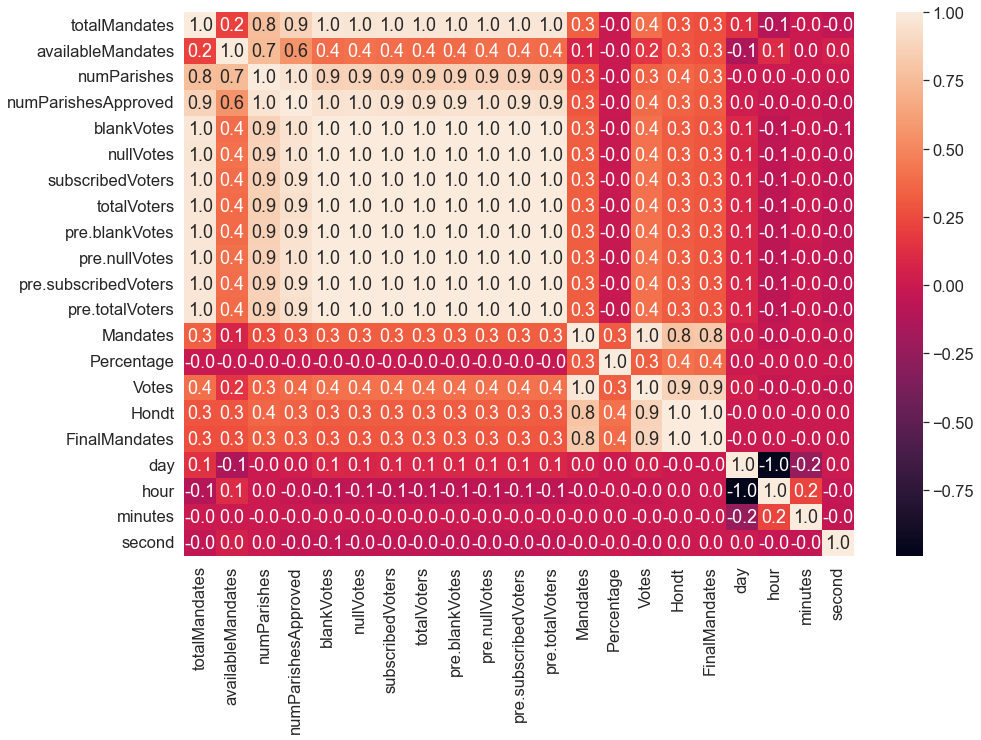

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(without_oulier_copy[['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Mandates', 'Percentage',
       'Votes', 'Hondt', 'FinalMandates', 'day', 'hour',
       'minutes', 'second']].corr(),annot=True,fmt="0.1f")

#### SECOND : X_TEST

_ check for duplicated rows

In [122]:
x_test.duplicated().sum()

0

In [123]:
x_test[numerical_col].isin([0.0,0]).mean()

totalMandates           0.230641
availableMandates       0.446498
numParishes             0.000000
numParishesApproved     0.000000
blankVotes              0.000000
nullVotes               0.000000
subscribedVoters        0.000000
totalVoters             0.000000
pre.blankVotes          0.000000
pre.nullVotes           0.000000
pre.subscribedVoters    0.000000
pre.totalVoters         0.000000
Percentage              0.000000
Votes                   0.000000
year                    0.000000
month                   0.000000
day                     0.000000
hour                    0.147293
minutes                 0.074108
second                  0.000000
day_name_Sunday         0.147293
dtype: float64

In [124]:
x_test.drop(columns=["Mandates","Hondt"],inplace=True)

In [125]:
x_test[["totalMandates","availableMandates","hour","day_name_Sunday"]].isin([0.0,0]).mean()

totalMandates        0.230641
availableMandates    0.446498
hour                 0.147293
day_name_Sunday      0.147293
dtype: float64

np.where function to impute with median() of x_train on x_test

In [126]:
x_test["totalMandates"]=np.where(x_test["totalMandates"].isin([0.0,0]),x_train["totalMandates"].median(),x_test["totalMandates"])

In [127]:
(x_test["totalMandates"]==0.0).sum()

0

In [128]:
x_test["availableMandates"]

17899     0
18256     9
19883     0
1713      9
21120     0
         ..
6133      3
14833     0
15092    10
14811    41
18924     0
Name: availableMandates, Length: 5411, dtype: int64

 - impute by x_train median and apply it on x_test to prevent leakage

In [129]:
x_test["availableMandates"]=x_test["availableMandates"].mask(x_test["availableMandates"]==0.0).fillna(x_train["availableMandates"].median())

In [130]:
x_test["hour"].replace(0.0,x_train["hour"].mean(),inplace=True)


In [131]:
x_test["hour"].replace(0,x_train["hour"].mode()[0],inplace=True)

- impute with mode of train dataset

In [132]:
x_test["minutes"]=x_test["minutes"].mask(x_test["minutes"].isin([0.0,0])).fillna(x_train["minutes"].mode()[0])

- scaling with scaler of x_train dataset without fitting

In [133]:
x_test[numerical_col]=scaler.transform(x_test[numerical_col])

c:\ProgramData\Anaonda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

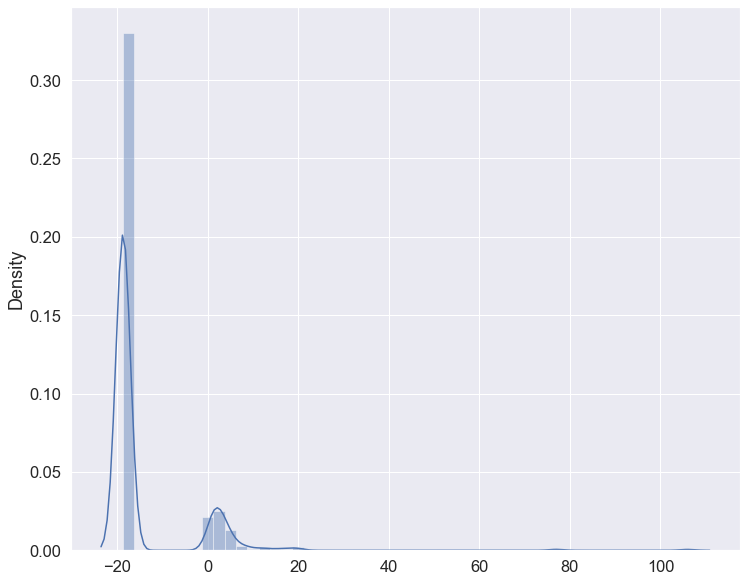

In [134]:
sns.distplot(y_train)

In [135]:
y_test.median()

0.0

In [136]:
y_test=np.where(y_test.isin([0.0]),cap_way,y_test)

In [137]:
y_test=pd.Series(y_test)

### MODELING

In [138]:
without_regressor={"linear":LinearRegression(),"Knn":KNeighborsRegressor(),"xgboost":XGBRegressor(),"random_forest":RandomForestRegressor(),"svr":SVR(),"decision_tree":DecisionTreeRegressor()}

In [145]:
x_train[numerical_col]

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Percentage,Votes,year,month,day,hour,minutes,second,day_name_Sunday
17034,0.830212,-0.749760,-0.317099,-0.020399,0.715264,0.630893,0.0,0.502202,0.709965,0.588552,0.0,0.496433,-1.026913,-0.422175,0.0,0.0,0.0,1.374559,0.755988,-0.998523,0.419292
8522,-0.680162,0.512150,-1.228272,-0.519283,0.284651,0.157187,0.0,0.223578,0.291641,0.171668,0.0,0.238993,0.049032,0.204947,0.0,0.0,0.0,-0.178019,1.614637,-0.998523,0.419292
9169,2.127177,1.889865,2.284463,2.701416,2.421606,2.512790,0.0,2.404695,2.412802,2.518324,0.0,2.428545,-1.049320,0.785314,0.0,0.0,0.0,0.541387,-1.826646,1.001480,0.419292
7315,-0.680162,0.512150,-1.228272,-0.533978,0.270093,0.138777,0.0,0.206137,0.278894,0.154829,0.0,0.221297,-0.086550,0.119340,0.0,0.0,0.0,-0.178019,0.755988,1.001480,0.419292
3537,-0.264779,0.240111,0.201921,-0.809168,-0.894999,-1.779168,0.0,-1.539255,-0.991026,-1.520864,0.0,-1.508433,-0.328839,-1.212142,0.0,0.0,0.0,-0.795064,1.614637,-0.998523,0.419292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.598297,-0.749760,0.878662,0.798793,0.377036,0.387290,0.0,0.338285,0.371309,0.395785,0.0,0.334377,-0.961811,-0.455293,0.0,0.0,0.0,0.541387,0.450250,-0.998523,0.419292
21575,1.337717,-0.749760,-1.657905,-0.661116,0.714344,0.748265,0.0,0.906531,0.745217,0.794226,0.0,0.910833,0.121355,0.660050,0.0,0.0,0.0,-1.619338,0.450250,-0.998523,-2.384972
5390,-0.264779,-1.785323,-1.167735,-0.595299,-0.873216,-0.868082,0.0,-0.847215,-0.827365,-0.971001,0.0,-0.809569,1.785688,1.201615,0.0,0.0,0.0,-0.178019,-0.933883,1.001480,0.419292
860,-0.264779,-0.749760,0.661052,-0.144567,-1.529089,-1.393455,0.0,-1.509960,-1.517950,-1.406885,0.0,-1.493949,-0.627663,-1.431360,0.0,0.0,0.0,-0.795064,-0.555091,1.001480,0.419292


In [146]:
for name2,model2 in without_regressor.items():
    model2.fit(x_train[numerical_col],y_train)
    prediction2=model2.predict(x_test[numerical_col])
    predict_train=model2.predict(x_train[numerical_col])

    print(f"name :{name2}")
    print(f"accuracy :{r2_score(y_test,prediction2)}")
    print(f"accuracy_training:{r2_score(y_train,predict_train)}")
    print ("_"*20)

name :linear
accuracy :-14.185476638240893
accuracy_training:0.4602895293940179
____________________
name :Knn
accuracy :0.6749473619465558
accuracy_training:0.9073487088464103
____________________
name :xgboost
accuracy :0.9823513380637116
accuracy_training:0.9994899818290083
____________________
name :random_forest
accuracy :0.9767877981377511
accuracy_training:0.998983672812489
____________________
name :svr
accuracy :0.08237774252536745
accuracy_training:0.7136946277588104
____________________
name :decision_tree
accuracy :0.9739385146275791
accuracy_training:0.9997190815041831
____________________


In [148]:
XG_model=XGBRegressor()
XG_model.fit(x_train[numerical_col],y_train)
XG_prediction=XG_model.predict(x_test[numerical_col])
r2_score(y_test,XG_prediction)

0.9823513380637116

#### Saving Model

In [149]:
joblib.dump(XG_model,"XGModel.h5")

['XGModel.h5']